## Domain background

In this project, I have developed a regression model to predict future stocks prices. Prediction of future stocks prices could help the user to develop a stretegy for a profitable investment and trading in stock market.

Investment firms, hedge funds and even individuals have been using financial models to better understand market behavior and make profitable investments and trades. A wealth of information is available in the form of historical stock prices and company performance data, suitable for machine learning algorithms to process.

For this project, I have built a stock price predictor that takes daily trading data over a certain date range as input, and outputs projected estimate for given query dates. The inputs will contain multiple metrics, such as opening price (Open), highest price the stock traded at (High), how many stocks were traded (Volume) and closing price adjusted for stock splits and dividends (Adjusted Close); the model predicts the Adjusted Close price.

Processes and procedures implemented in this project for data analysis and regression will be taken from Udacity's course "Machine Learning for Trading" by Prof. Tucker Balch. https://www.udacity.com/course/machine-learning-for-trading--ud501

## A problem statement

Use machine learning regression model to predict future stock prices in order to be able to buy and sell stocks for maximum profit.

## The datasets and inputs

There are several open sources for historical stock price data which are free to use:

Yahoo! Finance
Bloomberg API
Quandl
Google Finance

I will be using Yahoo! Finance.
A solution statement

Historical stock price data from yahoo finance will be used to train regression models. Different regression models will be evaluated for this problem.

## A benchmark model

Trained Regression model will be tested on real "adjusted close" price of the stock. Predicted and real market data will be compared.

## Evaluation metrics

The quality of prediction will be ensured using cross validation while training the model. The performance of the regressor will be quantified using r2_score and mean squared error.

## Project design

A basic run of the core system would involve one call to the training interface, and one or more calls to the query interface. I will Implement a train-test cycle to measure the performance of the model. Use it to test prediction accuracy for query dates at different intervals after the training end date, e.g. the day immediately after training end date, 7 days later, 14 days, 28 days, etc.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr   # using pandas datareader to get the desired data
%matplotlib inline
train = pdr.get_data_yahoo('FB', start='7/01/2012', end='5/15/2017')
test = pdr.get_data_yahoo('FB', start='5/16/2017', end='1/31/2018')
len(test)

181

We will use "train" and "test" as training and testing input-variable. Let us create a target-variable. Our target variable is "Adj Close" price of the stock "n days" later. To carry out this I appended a second "adjusted price" column to compare the price of the stock "n days" later. After copying over the column, I shifted the data up "n rows". With the addition of this new column, the dataset now has two adjusted price datapoints in the same row: current price and the stock price n-days later. With this information, the dataset can be processed by a machine learning algorithm for price predictions, and calculate the variation of the prediction against the actual stock price. 


In [2]:
# This function creates target variable by first taking the "Adj Close" price and then shifting it n rows up.
# Objective of the model is to predict adjusted close of n days later.

def target_variable(fb, n):
    fb['Adj_Close_n_Days_Later'] = fb['Adj Close']
    fb['Adj_Close_n_Days_Later'] = fb['Adj_Close_n_Days_Later'].shift(-n)
    return fb['Adj_Close_n_Days_Later']


In [3]:
a1=target_variable(train, 5) 
train['Adj_Close_n_Days_Later']=a1
train = train.dropna(0)

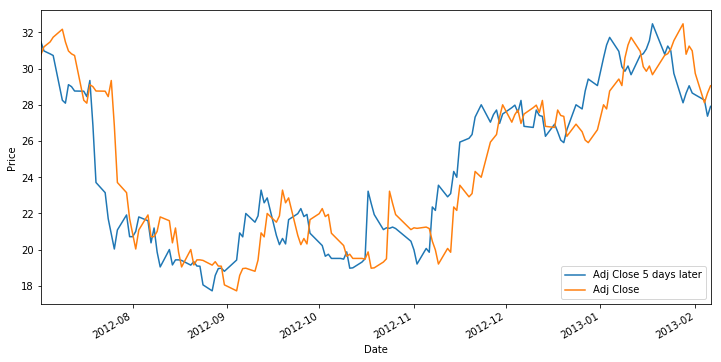

In [4]:
plt.figure(figsize=(12,6))
train['Adj_Close_n_Days_Later'].head(150).plot(label='Adj Close 5 days later')
train['Adj Close'].head(150).plot(label='Adj Close')
plt.ylabel("Price")
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend()
plt.savefig('target.png')
plt.savefig('Adj_Close.png') 
plt.show()

Here, our target is to take current day's data and predict the "Adj Close" of 5th day in future. 

Now, we separate input training variables and target variable.

In [5]:
input = train.iloc[0:len(train),:-1]
target = train.iloc[0:len(train), -1]

Using the same proceduce, we will divide the test dataset into input-variable and target-variable. 

In [6]:
a=target_variable(test, 5) 
test['Adj_Close_n_Days_Later']=a
test = test.dropna(0)
input_test = test.iloc[0:len(test),:-1]
target_test = test.iloc[0:len(test), -1]

In [7]:
input_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-16,150.110001,150.210007,149.029999,149.779999,149.779999,14550800
2017-05-17,148.000000,148.669998,144.419998,144.850006,144.850006,28300100
2017-05-18,144.720001,148.149994,144.509995,147.660004,147.660004,23031600
2017-05-19,148.449997,149.389999,147.960007,148.059998,148.059998,16187900
2017-05-22,148.080002,148.589996,147.690002,148.240005,148.240005,12586700


In [8]:
target_test.head()

Date
2017-05-16    148.070007
2017-05-17    150.039993
2017-05-18    151.960007
2017-05-19    152.130005
2017-05-22    152.380005
Name: Adj_Close_n_Days_Later, dtype: float64

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(input, target)               # Train the model using the training sets
pred = regr.predict(input_test)

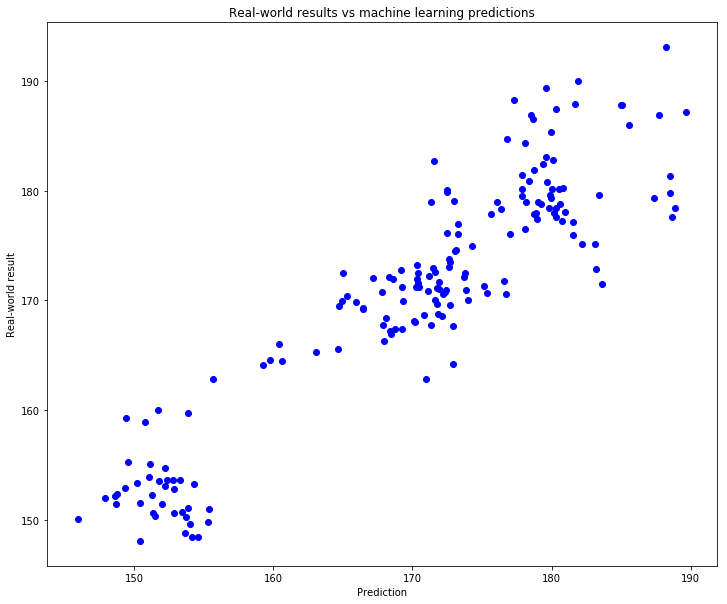

Score on training data
regr.score(X_train, y_train):  0.993092474576 

Score on testing (unseen) data
regr.score(X_test, y_test):  0.839370327102 

Mean squared error:  19.6700690344 



In [10]:
# Plot outputs
print "\n"
plt.figure(figsize=(12,10))
plt.title("Real-world results vs machine learning predictions")
plt.xlabel("Prediction")
plt.ylabel("Real-world result")
plt.scatter(pred, target_test, color='blue')
plt.savefig('pred-vs-real.png') 
plt.show()

print "Score on training data"
print "regr.score(X_train, y_train): ", regr.score(input, target), "\n"
print "Score on testing (unseen) data"
print "regr.score(X_test, y_test): ", regr.score(input_test, target_test), "\n"
print "Mean squared error: ", mean_squared_error(target_test, pred), "\n"

Here we observe a satisfactory regression score on training and testing data. The regression score (R2) will be used to compare different regression models the project. Let's investigate the performation of some "instance based" regression models.

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

regr = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0)
regr.fit(X_train, y_train)               # Train the model using the training sets
pred = regr.predict(input_test)
print "Score on training data"
print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
print "Score on testing (unseen) data"
print "regr.score(X_test, y_test): ", regr.score(input_test, target_test), "\n"
print "Mean squared error: ", mean_squared_error(target_test, regr.predict(input_test)), "\n"

Score on training data
regr.score(X_train, y_train):  1.0 

Score on testing (unseen) data
regr.score(X_test, y_test):  -3.21904495935 

Mean squared error:  516.647417084 



/home/vivek/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.ensemble.forest import RandomForestRegressor

regr = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0)
regr.fit(X_train, y_train)               # Train the model using the training sets
pred = regr.predict(input_test)
print "Score on training data"
print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
print "Score on testing (unseen) data"
print "regr.score(X_test, y_test): ", regr.score(input_test, target_test), "\n"
print "Mean squared error: ", mean_squared_error(target_test, regr.predict(input_test)), "\n"

Score on training data
regr.score(X_train, y_train):  0.998631683508 

Score on testing (unseen) data
regr.score(X_test, y_test):  -3.28752889821 

Mean squared error:  525.033687072 



In [13]:
from sklearn.neighbors import KNeighborsRegressor
regr = KNeighborsRegressor()

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0)
regr.fit(X_train, y_train)               # Train the model using the training sets
pred = regr.predict(input_test)
print "Score on training data"
print "regr.score(X_train, y_train): ", regr.score(X_train, y_train), "\n"
print "Score on testing (unseen) data"
print "regr.score(X_test, y_test): ", regr.score(input_test, target_test), "\n"
print "Mean squared error: ", mean_squared_error(target_test, regr.predict(input_test)), "\n"

Score on training data
regr.score(X_train, y_train):  0.483349931394 

Score on testing (unseen) data
regr.score(X_test, y_test):  -38.7610842249 

Mean squared error:  4868.98377788 



A negative R2 score indicates that Decision Tree Regressor, Random Forest or KNN can not be used for this problem. Therefore, for the further analysis we will used Linear Regression model.

Currently model using a linear regressor can predict "adj close" five days in advance. Let's see effect of changing "n" which determines "number of days" in advance model can predict the "adj close".

In [14]:
d = {'Days, n': [5, 7, 14, 21, 28], 'R2': [0.84, 0.78, 0.57, 0.46, 0.33], 'Mean Squared Error': [9.23, 12.90, 28.00, 42.32, 59.95]}
df = pd.DataFrame(data=d)
df.set_index('Days, n', inplace=True)
df

,Mean Squared Error,R2
"Days, n",,
5,9.23,0.84
7,12.90,0.78
14,28.00,0.57
21,42.32,0.46
28,59.95,0.33


From the table shown above we notice that with increase in "n" R2 falls rapidly.

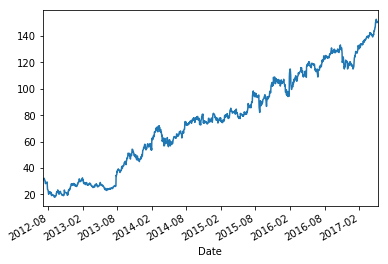

In [15]:
train['Adj Close'].plot()
plt.savefig('fb-long-term.png')
plt.show()

From the figure shown above we notice two patterns in the stock price. First one is long term increase in the stock price
and the second one is random short term fluctuations. In order to maximize the profit we will develop two investment strategies; one for long term and another for short term. For long term prediction we will take 30 days rolling mean of our current target variable. Our short term strategy is to observe 30 days variation in the stock prices and expect similar variation for the future.

In [16]:
def stock_data(symbol):
    stock = pdr.get_data_yahoo(symbol, start='7/01/2013', end='1/15/2018')
    return stock
#fb=stock_data('FB')

def plot(symbol):
    symbol.plot()
    plt.show()
#plot(fb)

In [17]:
def features(fb, m=20, n=5):
    #fb = pdr.get_data_yahoo(symbol, start='7/01/2007', end='1/15/2018')
    fb['Adj_Close_5_Days_Later'] = fb['Adj Close']
    fb['Adj_Close_5_Days_Later'] = fb['Adj_Close_5_Days_Later'].shift(-n)
    fb['rolling mean'] = fb['Adj_Close_5_Days_Later'].rolling(m).mean()
    fb['noise'] = fb['Adj_Close_5_Days_Later'] - fb['rolling mean']
    fb['noise'] = fb['noise'].rolling(n).mean()
    fb = fb.dropna(0)
    f1 = fb.drop(['Adj_Close_5_Days_Later', 'noise'], axis = 1)
    f2 = fb.drop(['Adj_Close_5_Days_Later', 'rolling mean'], axis = 1)
    a = len(fb)
    b = a - 181
    c = b - 1
    X_train1 = f1.iloc[0:c,:-1]
    y_train1 = f1.iloc[0:c, -1]
    X_test1 = f1.iloc[b:a,:-1]
    y_test1 = f1.iloc[b:a, -1]
    X_train2 = f2.iloc[0:c,:-1]
    y_train2 = f2.iloc[0:c, -1]
    X_test2 = f2.iloc[b:a,:-1]
    y_test2 = f2.iloc[b:a, -1]
    return X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2

In [18]:
X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2 = features(train, 20, 5)

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(X_train1, y_train1)               # Train the model using the training sets
pred = regr.predict(X_test1)              # Query
print "regr.score(X_test, y_test): ", regr.score(X_test1, y_test1), "\n"
print "Mean squared error: ", mean_squared_error(y_test1, regr.predict(X_test1)), "\n"

regr.score(X_test, y_test):  0.919586233171 

Mean squared error:  4.66326003072 



In [19]:
d = {'Days, n': [5, 7, 14, 21, 28], 'R2': [0.92, 0.93, 0.90, 0.75, 0.56], 'Squared Error': [5.05, 4.08, 6.33, 16.76, 29.12]}
df = pd.DataFrame(data=d)
df.set_index('Days, n', inplace=True)
df

,R2,Squared Error
"Days, n",,
5,0.92,5.05
7,0.93,4.08
14,0.90,6.33
21,0.75,16.76
28,0.56,29.12


Thus, with "20 days rolling Adj Close" we get higher R2 and lower standard deviation in the stock prices.

## Long-term trend

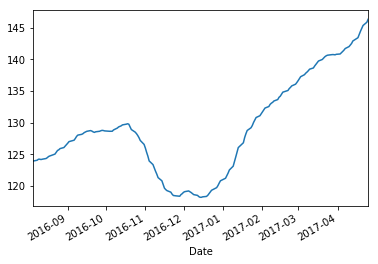

In [20]:
X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2 = features(train, 20, 10)
y_test1.plot()
plt.savefig('rolling-mean.png')
plt.show()

## Short-term fluctuations

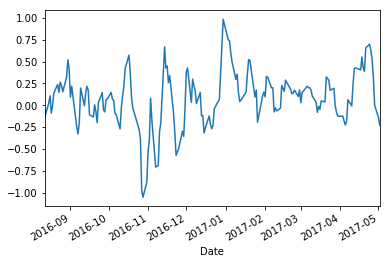

In [21]:
X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2 = features(train, 2, 5)
y_test2.plot()
plt.savefig('noise.png')
plt.show()

Random stock price fluctuation gives idea about how much fluctutation could be expected in future.

## Let's now investigate performance of our linear regressor for some more stocks with 5 days advanced prediction (n=5). Here, rolling mean has been taken for 20 days window.

In [22]:
# GOOGLE
data = pdr.get_data_yahoo('GOOG', start='7/01/2012', end='2/8/2018')
X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2 = features(data, 20, 5)

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(X_train1, y_train1)               # Train the model using the training sets
pred = regr.predict(X_test1)              # Query
print "regr.score(X_test, y_test): ", regr.score(X_test1, y_test1), "\n"
print "Mean squared error: ", mean_squared_error(y_test1, regr.predict(X_test1)), "\n"

regr.score(X_test, y_test):  0.937944486705 

Mean squared error:  232.602665748 



In [23]:
# APPLE
data = pdr.get_data_yahoo('AAPL', start='7/01/2012', end='2/8/2018')
X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2 = features(data, 20, 5)

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(X_train1, y_train1)               # Train the model using the training sets
pred = regr.predict(X_test1)              # Query
print "regr.score(X_test, y_test): ", regr.score(X_test1, y_test1), "\n"
print "Mean squared error: ", mean_squared_error(y_test1, regr.predict(X_test1)), "\n"

regr.score(X_test, y_test):  0.90580601805 

Mean squared error:  9.19456773431 



In [24]:
# Microsoft
data = pdr.get_data_yahoo('MSFT', start='7/01/2012', end='2/8/2018')
X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2 = features(data, 20, 5)

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(X_train1, y_train1)               # Train the model using the training sets
pred = regr.predict(X_test1)              # Query
print "regr.score(X_test, y_test): ", regr.score(X_test1, y_test1), "\n"
print "Mean squared error: ", mean_squared_error(y_test1, regr.predict(X_test1)), "\n"

regr.score(X_test, y_test):  0.976570504331 

Mean squared error:  1.1172654928 



In [25]:
# Toyota
data = pdr.get_data_yahoo('TM', start='7/01/2012', end='2/8/2018')
X_train1, X_train2, y_train1, y_train2, X_test1, X_test2, y_test1, y_test2 = features(data, 20, 5)

regr = linear_model.LinearRegression()   # Create linear regression object
regr.fit(X_train1, y_train1)               # Train the model using the training sets
pred = regr.predict(X_test1)              # Query
print "regr.score(X_test, y_test): ", regr.score(X_test1, y_test1), "\n"
print "Mean squared error: ", mean_squared_error(y_test1, regr.predict(X_test1)), "\n"

regr.score(X_test, y_test):  0.971032636847 

Mean squared error:  2.53513077525 



## Let's plot actual and predicted target values in the same figure for comparison.

In [31]:
y_test1 = y_test1.reset_index()
y_test1['pred']=pred
y_test1=y_test1.rename(columns = {'rolling mean':'actual'})
y_test1=y_test1.rename(columns = {'pred':'predicted'})
y_test1.head()

,Date,actual,predicted
0,2017-05-17,107.8570,107.632964
1,2017-05-18,107.7515,106.819745
2,2017-05-19,107.6995,107.491416
3,2017-05-22,107.6785,107.581293
4,2017-05-23,107.5935,107.981308


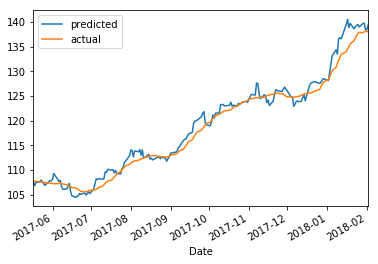

In [32]:
plt.figure(figsize=(12,6))
y_test1.plot(x='Date', y=["predicted", "actual"])
plt.savefig('act-vs-pred.png')
plt.show()

Thus, we see that simple linear regressor performs satisfactory and predicts long term trends. It was also found that instance based model performed badly for this problem.